# S.O.L.I.D. Principles for ML Practitioners

##### By Wolfgang Giersche, Zühlke Engineering AG



In the following demonstration, I am using the most current Tensorflow API 1.6.0 rc1 with the following building blocks:

- [Tensorflow Dataset API](https://www.tensorflow.org/programmers_guide/datasets)
    - Allows for pre-processing with a monadic API (map, flatmap, etc)
    - Preprocessing may even happen in parallel streaming fashion
    
- [Estimator API](https://www.tensorflow.org/programmers_guide/estimators)
    - very convenient highlevel API
    - Checkpointing and recovery 
    - Tensorboard summaries
    - much more...
- [Multi-GPU Training of contrib.estimator package](https://www.tensorflow.org/api_docs/python/tf/contrib/estimator/)
    - convenient wrapper to distribute training on any number of GPUs on a single machine
    - works by means of synchonous gradient averaging over parallel mini-batches

This tutorial is based on  [Google's official TF MNIST example](https://github.com/tensorflow/models/tree/master/official/mnist), only this time
using [Zalando Research's Fashion Dataset](https://github.com/zalandoresearch/fashion-mnist)
instead of the typical [Handwritten Digits](http://yann.lecun.com/exdb/mnist/).

The [S.O.L.I.D. Principles](http://www.cvc.uab.es/shared/teach/a21291/temes/object_oriented_design/materials_adicionals/principles_and_patterns.pdf) 
are commonly attributed to [Robert C. Martin (Uncle Bob)](https://de.wikipedia.org/wiki/Robert_Cecil_Martin).


## Prelude: Looking at the Problem

We want to understand what piece of clothing is depicted on each image

In [2]:
from IPython.display import Image
from matplotlib import pyplot as plt
import dataset
import tensorflow as tf

In [3]:
sess = tf.InteractiveSession()

In [25]:
training_set = dataset.training_dataset("/var/ellie/data/mnist_fashion")
next_set = training_set.batch(10).make_one_shot_iterator().get_next()

In [28]:
next = sess.run(next_set)

Let's have a look into the box!

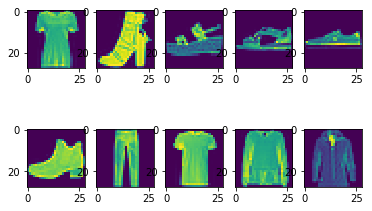

In [29]:
f, arr = plt.subplots(2,5)
for row in (0, 1):
    for col in range(5):
        i = 5 * row + col
        img = next[0][i].reshape([28,28])
        arr[row, col].imshow(img)

The 10 classes are 

| Label | Description |
--------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |


### The Anatomy of an Experiment

![Anatomy of an ML epic](doc/Anatomy-of-an-experiment.png)

Exactly because data analytics and machine learning have rather exploratory traits, 
practices better support changes without endangering the quality of the code. After the very first exploratory cycles, re-use of code fragments becomes more and more valuable and time-saving. At the same time, changing existing code introduces more and more subtle bugs, since you usually don't go through all the code again to check for side effects of your changes.

Let's develop an architecture that optimally supports exploratory practices. 